# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 8</span>


### Exercise 08.1

Write a C++ Variational Monte Carlo code for a single quantum particle in 1D which exploits the Metropolis algorithm to sample a trial wave function $|\Psi_T(x)|^2$ using an uniform transition probability $T(x_{new}|x_{old})$ (Suggestion: as a starting point, you can use the code you have already developed for the Hydrogen atom or the Monte Carlo NVT code). Using data blocking, the code should be able to compute the expectation value for the Hamiltonian

$$
\langle {\hat H} \rangle_T = 
\frac{\int dx \Psi^*_T(x) {\hat H} \Psi_T(x)}
{\int dx |\Psi_T(x)|^2} = 
\int dx \frac{|\Psi_T(x)|^2}{\int dx |\Psi_T(x)|^2} \frac{{\hat H} \Psi_T(x)}{\Psi_T(x)}
$$

which can be used to find the parameters that minimize this quantity.

### Exercise 08.2

Use your Variational Monte Carlo code to find the parameters $\sigma$ and $\mu$ which minimize $\langle {\hat H} \rangle_T$:

$$
\langle {\hat H} \rangle_T = \frac{\langle \Psi_T^{\sigma,\mu}| {\hat H} | \Psi_T^{\sigma,\mu} \rangle}
{\langle \Psi_T^{\sigma,\mu} | \Psi_T^{\sigma,\mu} \rangle} \ge E_0 =
\frac{\langle \Psi_0| {\hat H} | \Psi_0 \rangle}
{\langle \Psi_0 | \Psi_0 \rangle}
$$

- As usual, <span style="color:red">show a picture of the estimation of $\langle {\hat H} \rangle_T$ </span> and its statistical uncertainty as a function of the number of blocks/MC steps for the set of parameters which minimize $\langle {\hat H} \rangle_T$
- <span style="color:red">show also a picture **of the sampled** $|\Psi_T(x)|^2$</span> by filling a histogram with the sampled configurations, moreover compare it with the analytic curve of $|\Psi_T(x)|^2$ and with the numerical solution obtained by transforming the Schrodinger equation into a matrix equation (see below).

### CODICE

Il codice che ho prodotto contiene:

- Un header file, contenente le variabili utili allo svolgimento dell'esercizio;
- Un main, che contiene il programma e tutte le funzioni necessarie;
- Un file input.dat, che fornisce al programma le informazioni per il data blocking e per l'ottimizzazione dei parametri;
- I codici e file necessari per il generatore di numeri pseudocasuali;
- Un makefile;

Il codice esegue queste operazioni:

- Legge dal file input.dat:
    - il numero di blocchi e il numero di campionamenti in ogni blocco;
    - il numero di bin con cui produrre l'istogramma del modulo quadro dell'autofunzione trial;
    - un valore delta per l'algoritmo di Metropolis, che campiona $X_{new}$ in un intervallo di $\pm$ delta centrato in $X_{old}$;
    - il "raffreddamento" ad ogni step di simulated annealing;
    - un valore delta per ognuno dei parametri per la mossa Metropolis dei parametri nel simulated annealing;
    - una variabile che, se posta a 1, fa eseguire al codice l'ottimizzazione dei parametri;
    
- Ottimizza i parametri:
    - esegue il simulated annealing partendo da T = 1 + un tempo di raffreddamento (dato da input), fino a T = tempo di raffreddamento (esegue 1/cooling step di ottimizzazione); al termine salva in un file parameter_optimized.dat i valori di mu e sigma ottimizzati); se nella cartella esiste il file parameter_optimized.dat (si trova nella cartella data), il codice legge immediatamente i parametri già ottimizzati dal file; se si vuole ri-eseguire l'ottimizzazione, anche in presenza del file il codice la esegue se l'ultima variabile di input è messa = 1;
    
- Ciclo sui blocchi e sugli step per blocco:
    - In ogni blocco sono invocate una funzione Reset() prima del ciclo sugli step e una funzione Averages() alla fine del ciclo sugli step, che rispettivamente azzerano gli array del data blocking ed eseguono il data blocking;
    - Ad ogni step sono invocate la funzione Move(), che esegue il campionamento con l'algoritmo di Metropolis, e la funzione Measure(), che calcola il valore della funzione da integrare, riempie il bin dell'istogramma, e quindi fa l'update delle misure nelle variabili utili al data blocking (la funzione Accumulate() non è presente; l'ho riassorbita nella funzione Measure());
    
- Altre funzioni:
    - Error(): calcola l'incertezza statistica nel data blocking;
    - PSI(x): valuta l'autofunzione trial nel punto x (utilizzata in Hamiltonian());
    - PSI_mod2(x): valuta il modulo quadro dell'autofunzione trial (utilizzata dell'algoritmo Metropolis);
    - PSI_derivative2(x): valuta la derivata seconda dell'autofunzione trial (utilizzata in Hamiltonian());
    - Potential(x): valuta il potenziale assegnato nell'esercizio (utilizzata in Hamiltonian());
    - Hamiltonian(x): valuta l'integranda utilizzando le precedenti funzioni, tranne per il modulo quadro dell'autofunzione, campionata dell'algoritmo di Metropolis;

### Risultati dell'esercizio

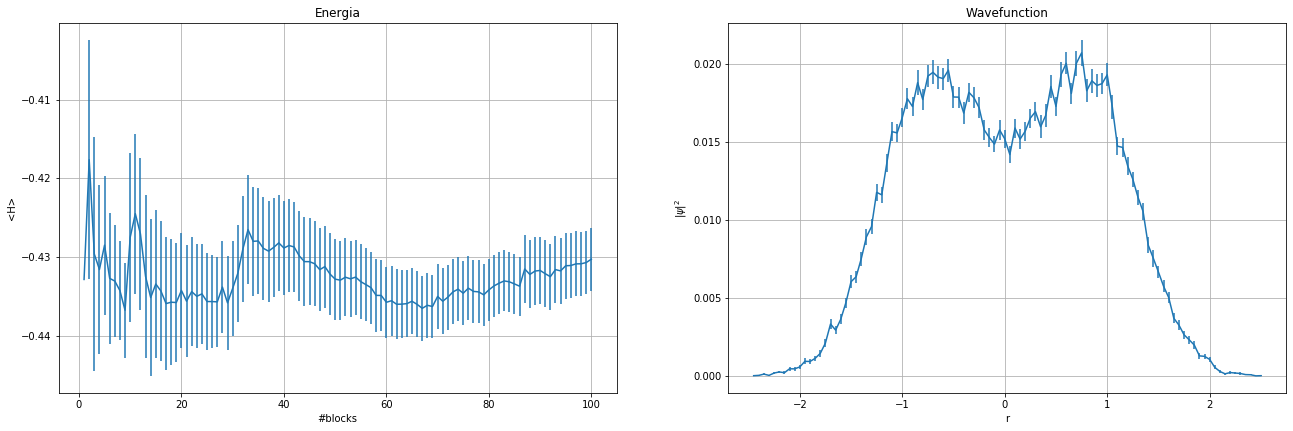

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np

ene = np.loadtxt("data/ave_EGS.dat").T
wave = np.loadtxt("data/wavefunction.dat").T

wave[0] *= 0.05
wave[0] += -2.5

plt.figure(figsize=[22,6.8])
plt.subplot(1,2,1)
plt.errorbar(ene[0],ene[1],yerr=ene[2])
plt.title("Energia")
plt.xlabel('#blocks')
plt.ylabel('<H>')
plt.grid(True)
plt.subplot(1,2,2)
plt.errorbar(wave[0],wave[1],yerr=wave[2])
plt.title("Wavefunction")
plt.xlabel('r')
plt.ylabel('|$\psi$|$^2$')
plt.grid(True)
plt.show()

### Exercise 08.3

Use the PIMC/PIGS code we have provided to study the same 1D quantum system. Use the PIGS algorithm ($T=0$) to project
- a constant trial wave function, $\Psi_T(x)=1$
- using $\Psi_T(x) = \Psi_T^{\sigma,\mu}(x)$ with the variational parameters you have optimized.

<span style="color:red">Compare your results with those obtained with your VMC code</span>. By using $\Psi_T^{\sigma,\mu}(x)$, how much can you reduce the imaginary time propagation with respect to the first case?

<span style="color:red">Finally, use the PIMC algorithm ($T>0$) to observe how the histogram with the sampled configurations changes by increasing the temperature.</span>

### PIGS - constant trial wavefunction

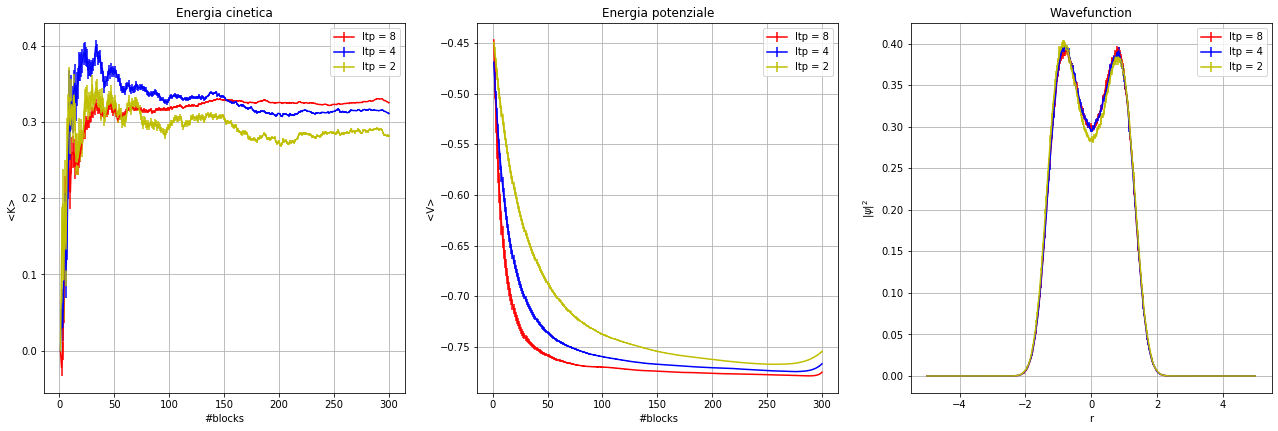

In [11]:
PIGScostK = np.loadtxt("PIGS_COST/t1/kinetic.dat").T
PIGScostP = np.loadtxt("PIGS_COST/t1/potential.dat").T
PIGScostF = np.loadtxt("PIGS_COST/t1/probability.dat").T
PIGScostK2 = np.loadtxt("PIGS_COST/t2/kinetic.dat").T
PIGScostP2 = np.loadtxt("PIGS_COST/t2/potential.dat").T
PIGScostF2 = np.loadtxt("PIGS_COST/t2/probability.dat").T
PIGScostK3 = np.loadtxt("PIGS_COST/t3/kinetic.dat").T
PIGScostP3 = np.loadtxt("PIGS_COST/t3/potential.dat").T
PIGScostF3 = np.loadtxt("PIGS_COST/t3/probability.dat").T
#DATA BLOCKING
PIGScostKDB = np.zeros(300)
PIGScostPDB = np.zeros(300)
PIGScostK2DB = np.zeros(300)
PIGScostP2DB = np.zeros(300)
PIGScostK3DB = np.zeros(300)
PIGScostP3DB = np.zeros(300)
PIGScostKEr = np.zeros(300)
PIGScostPEr = np.zeros(300)
PIGScostK2Er = np.zeros(300)
PIGScostP2Er = np.zeros(300)
PIGScostK3Er = np.zeros(300)
PIGScostP3Er = np.zeros(300)
b=0
a=0
c=0
d=0
e=0
f=0
a2=0
b2=0
c2=0
d2=0
e2=0
f2=0
x=np.arange(300)


for i in range(300):
    a += PIGScostK[1][i]
    a2 += PIGScostK[1][i]**2
    PIGScostKDB[i] = a/(i+1)
    PIGScostKEr[i] = np.sqrt(a2/(i+1) - PIGScostKDB[i]**2)/(i+1)
    b += PIGScostP[1][i]
    b2 += PIGScostP[1][i]**2
    PIGScostPDB[i] = b/(i+1)
    PIGScostPEr[i] = np.sqrt(b2/(i+1) - PIGScostPDB[i]**2)/(i+1)
    c += PIGScostK2[1][i]
    c2 += PIGScostK2[1][i]**2
    PIGScostK2DB[i] = c/(i+1)
    PIGScostK2Er[i] = np.sqrt(c2/(i+1) - PIGScostK2DB[i]**2)/(i+1)
    d += PIGScostP2[1][i]
    d2 += PIGScostP2[1][i]**2
    PIGScostP2DB[i] = d/(i+1)
    PIGScostP2Er[i] = np.sqrt(d2/(i+1) - PIGScostP2DB[i]**2)/(i+1)
    e += PIGScostK3[1][i]
    e2 += PIGScostK3[1][i]**2
    PIGScostK3DB[i] = e/(i+1)
    PIGScostK3Er[i] = np.sqrt(e2/(i+1) - PIGScostK3DB[i]**2)/(i+1)
    f += PIGScostP3[1][i]
    f2 += PIGScostP3[1][i]**2
    PIGScostP3DB[i] = f/(i+1)
    PIGScostP3Er[i] = np.sqrt(f2/(i+1) - PIGScostP3DB[i]**2)/(i+1)

plt.figure(figsize=[22,6.8])
plt.subplot(1,3,1)
plt.errorbar(x+1,PIGScostKDB,yerr=PIGScostKEr, label='Itp = 8', color='r')
plt.errorbar(x+1,PIGScostK2DB,yerr=PIGScostK2Er, label='Itp = 4', color='b')
plt.errorbar(x+1,PIGScostK3DB,yerr=PIGScostK3Er, label='Itp = 2', color='y')
plt.legend()
plt.title("Energia cinetica")
plt.xlabel('#blocks')
plt.ylabel('<K>')
plt.grid(True)
plt.subplot(1,3,2)
plt.errorbar(x+1,PIGScostPDB,yerr=PIGScostPEr, label='Itp = 8', color='r')
plt.errorbar(x+1,PIGScostP2DB,yerr=PIGScostP2Er, label='Itp = 4', color='b')
plt.errorbar(x+1,PIGScostP3DB,yerr=PIGScostP3Er, label='Itp = 2', color='y')
plt.legend()
plt.title("Energia potenziale")
plt.xlabel('#blocks')
plt.ylabel('<V>')
plt.grid(True)
plt.subplot(1,3,3)
plt.errorbar(PIGScostF[0],PIGScostF[1],yerr=PIGScostF[2], label='Itp = 8', color='r')
plt.errorbar(PIGScostF2[0],PIGScostF2[1],yerr=PIGScostF2[2], label='Itp = 4', color='b')
plt.errorbar(PIGScostF3[0],PIGScostF3[1],yerr=PIGScostF3[2], label='Itp = 2', color='y')
plt.legend()
plt.title("Wavefunction")
plt.xlabel('r')
plt.ylabel('|$\psi$|$^2$')
plt.grid(True)
plt.show()


### PIGS - trial wavefunction with optimized parameters

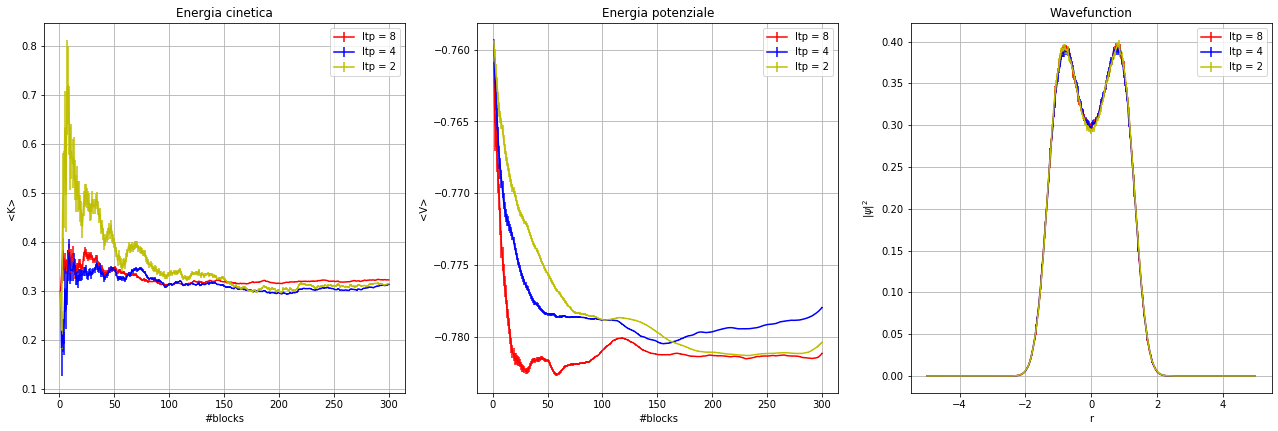

In [8]:
PIGScostK = np.loadtxt("PIGS_OPT/t1/kinetic.dat").T
PIGScostP = np.loadtxt("PIGS_OPT/t1/potential.dat").T
PIGScostF = np.loadtxt("PIGS_OPT/t1/probability.dat").T
PIGScostK2 = np.loadtxt("PIGS_OPT/t2/kinetic.dat").T
PIGScostP2 = np.loadtxt("PIGS_OPT/t2/potential.dat").T
PIGScostF2 = np.loadtxt("PIGS_OPT/t2/probability.dat").T
PIGScostK3 = np.loadtxt("PIGS_OPT/t3/kinetic.dat").T
PIGScostP3 = np.loadtxt("PIGS_OPT/t3/potential.dat").T
PIGScostF3 = np.loadtxt("PIGS_OPT/t3/probability.dat").T
#DATA BLOCKING
PIGScostKDB = np.zeros(300)
PIGScostPDB = np.zeros(300)
PIGScostK2DB = np.zeros(300)
PIGScostP2DB = np.zeros(300)
PIGScostK3DB = np.zeros(300)
PIGScostP3DB = np.zeros(300)
PIGScostKEr = np.zeros(300)
PIGScostPEr = np.zeros(300)
PIGScostK2Er = np.zeros(300)
PIGScostP2Er = np.zeros(300)
PIGScostK3Er = np.zeros(300)
PIGScostP3Er = np.zeros(300)
b=0
a=0
c=0
d=0
e=0
f=0
a2=0
b2=0
c2=0
d2=0
e2=0
f2=0
x=np.arange(300)


for i in range(300):
    a += PIGScostK[1][i]
    a2 += PIGScostK[1][i]**2
    PIGScostKDB[i] = a/(i+1)
    PIGScostKEr[i] = np.sqrt(a2/(i+1) - PIGScostKDB[i]**2)/(i+1)
    b += PIGScostP[1][i]
    b2 += PIGScostP[1][i]**2
    PIGScostPDB[i] = b/(i+1)
    PIGScostPEr[i] = np.sqrt(b2/(i+1) - PIGScostPDB[i]**2)/(i+1)
    c += PIGScostK2[1][i]
    c2 += PIGScostK2[1][i]**2
    PIGScostK2DB[i] = c/(i+1)
    PIGScostK2Er[i] = np.sqrt(c2/(i+1) - PIGScostK2DB[i]**2)/(i+1)
    d += PIGScostP2[1][i]
    d2 += PIGScostP2[1][i]**2
    PIGScostP2DB[i] = d/(i+1)
    PIGScostP2Er[i] = np.sqrt(d2/(i+1) - PIGScostP2DB[i]**2)/(i+1)
    e += PIGScostK3[1][i]
    e2 += PIGScostK3[1][i]**2
    PIGScostK3DB[i] = e/(i+1)
    PIGScostK3Er[i] = np.sqrt(e2/(i+1) - PIGScostK3DB[i]**2)/(i+1)
    f += PIGScostP3[1][i]
    f2 += PIGScostP3[1][i]**2
    PIGScostP3DB[i] = f/(i+1)
    PIGScostP3Er[i] = np.sqrt(f2/(i+1) - PIGScostP3DB[i]**2)/(i+1)

plt.figure(figsize=[22,6.8])
plt.subplot(1,3,1)
plt.errorbar(x+1,PIGScostKDB,yerr=PIGScostKEr, label='Itp = 8', color='r')
plt.errorbar(x+1,PIGScostK2DB,yerr=PIGScostK2Er, label='Itp = 4', color='b')
plt.errorbar(x+1,PIGScostK3DB,yerr=PIGScostK3Er, label='Itp = 2', color='y')
plt.legend()
plt.title("Energia cinetica")
plt.xlabel('#blocks')
plt.ylabel('<K>')
plt.grid(True)
plt.subplot(1,3,2)
plt.errorbar(x+1,PIGScostPDB,yerr=PIGScostPEr, label='Itp = 8', color='r')
plt.errorbar(x+1,PIGScostP2DB,yerr=PIGScostP2Er, label='Itp = 4', color='b')
plt.errorbar(x+1,PIGScostP3DB,yerr=PIGScostP3Er, label='Itp = 2', color='y')
plt.legend()
plt.title("Energia potenziale")
plt.xlabel('#blocks')
plt.ylabel('<V>')
plt.grid(True)
plt.subplot(1,3,3)
plt.errorbar(PIGScostF[0],PIGScostF[1],yerr=PIGScostF[2], label='Itp = 8', color='r')
plt.errorbar(PIGScostF2[0],PIGScostF2[1],yerr=PIGScostF2[2], label='Itp = 4', color='b')
plt.errorbar(PIGScostF3[0],PIGScostF3[1],yerr=PIGScostF3[2], label='Itp = 2', color='y')
plt.legend()
plt.title("Wavefunction")
plt.xlabel('r')
plt.ylabel('|$\psi$|$^2$')
plt.grid(True)
plt.show()


### PIMC

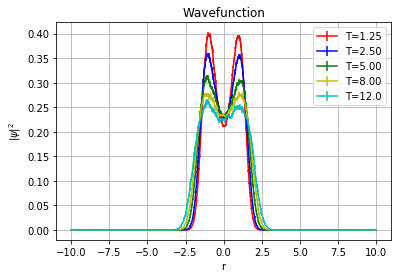

In [4]:
T1 = np.loadtxt("PIMC/T1/probability.dat").T
T2 = np.loadtxt("PIMC/T2/probability.dat").T
T3 = np.loadtxt("PIMC/T3/probability.dat").T
T4 = np.loadtxt("PIMC/T4/probability.dat").T
T5 = np.loadtxt("PIMC/T5/probability.dat").T

plt.errorbar(T1[0],T1[1],yerr=T1[2], label='T=1.25', color='r')
plt.errorbar(T2[0],T2[1],yerr=T2[2], label='T=2.50', color='b')
plt.errorbar(T3[0],T3[1],yerr=T3[2], label='T=5.00', color='g')
plt.errorbar(T4[0],T4[1],yerr=T4[2], label='T=8.00', color='y')
plt.errorbar(T5[0],T5[1],yerr=T5[2], label='T=12.0', color='c')
plt.legend()
plt.title("Wavefunction")
plt.xlabel('r')
plt.ylabel('|$\psi$|$^2$')
plt.grid(True)
plt.show()

### Commenti

- PIGS: Con la funzione trial costante le medie a blocchi per l'energia cinetica e potenziale convergono a valori diversi abbassando li tempo di propagazione immaginario, mentre per la funzione trial "nostra", con i parametri ottimizzati, non c'è molta differenza almeno portando il tempo da 8 a 2; l'istogramma della funzione campionata non cambia sensibilmente.

- PIMC: Aumentando la temperatura l'istogramma tende ad essere più piatto; sembra che si ottengano meno campioni nelle buche di potenziale, poichè l'alta temperatura tende a far uscire dalle buche il punto campionato.

#### Soluzioni analitiche

Ground state energy:  -0.46046587969271535
1st excited state energy:  0.0974247133176099
2nd excited state energy:  1.9717331343930198


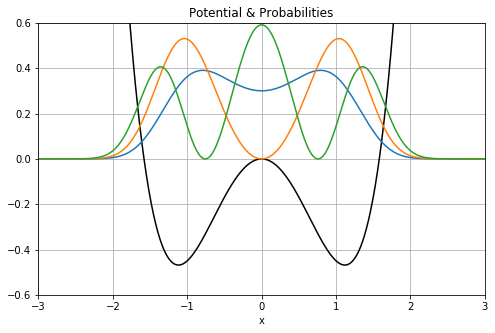

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def Vpot(x):
    return (x**2 - 2.5)*x**2
    #return 0.5*x**2

hbar = 1
m = 1
a = 10
N = 1000 # number of iterations

# Step sizes
x = np.linspace(-a/2, a/2, N)
dx = x[1] - x[0] # the step size
V = Vpot(x)

# The central differences method: f" = (f_1 - 2*f_0 + f_-1)/dx^2

CDiff = np.diag(np.ones(N-1),-1)-2*np.diag(np.ones(N),0)+np.diag(np.ones(N-1),1)
# np.diag(np.array,k) construct a "diagonal" matrix using the np.array
# The default is k=0. Use k>0 for diagonals above the main diagonal, 
# and k<0 for diagonals below the main diagonal

# Hamiltonian matrix
H = (-(hbar**2)*CDiff)/(2*m*dx**2) + np.diag(V)

# Compute eigenvectors and their eigenvalues
E,psi = np.linalg.eigh(H)

# Take the transpose & normalize
psi = np.transpose(psi)
psi = psi/np.sqrt(dx)

print("Ground state energy: ", E[0])
print("1st excited state energy: ", E[1])
print("2nd excited state energy: ", E[2])

# Plot a few things
plt.figure(figsize=(8,5))
scale = 0.3
plt.plot(x, scale*V, color="Black", label="Potential") # plot the potential
plt.plot(x,(psi[0])**2)
plt.plot(x,(psi[1])**2)
plt.plot(x,(psi[2])**2)
plt.title("Potential & Probabilities")
plt.xlabel("x")
plt.grid(True)
plt.xlim((-3,3))
plt.ylim((-0.6,0.6))
plt.show()